<a href="https://colab.research.google.com/github/susanemiliaw/NTHU_2025_DLIA_HW/blob/main/Adriadne%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/lar-unibo/ariadne_plus.git
%cd ariadne_plus

Cloning into 'ariadne_plus'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 74 (delta 5), reused 11 (delta 1), pack-reused 55 (from 1)
Receiving objects: 100% (74/74), 46.69 MiB | 28.53 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/ariadne_plus


In [4]:
!nvidia-smi

Mon Jun  2 07:30:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
%pwd

'/content/ariadne_plus'

In [6]:
!ls

CMakeLists.txt	      package.xml	      scripts
fake_topic_camera.py  README.md		      srv
figures		      run_ariadne_action.py   test_images
launch		      run_ariadne.py
msg		      run_ariadne_service.py


In [7]:
!pip install torch torchvision torchaudio
!pip install opencv-python
!pip install scikit-image
!pip install matplotlib
!pip install tqdm
!pip install pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [8]:
%%writefile requirements.txt
torch
torchvision
torchaudio
opencv-python
scikit-image
matplotlib
tqdm
pyyaml

Writing requirements.txt


In [9]:
!pip install -r requirements.txt

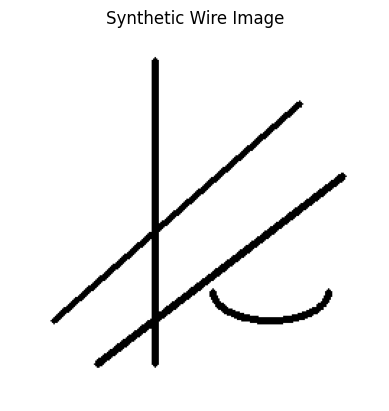

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank white image
img = np.ones((256, 256, 3), dtype=np.uint8) * 255

# Draw some curved and straight "wires" (black lines)
cv2.line(img, (30, 200), (200, 50), (0, 0, 0), thickness=3)
cv2.line(img, (60, 230), (230, 100), (0, 0, 0), thickness=3)
cv2.line(img, (100, 20), (100, 230), (0, 0, 0), thickness=3)
cv2.ellipse(img, (180, 180), (40, 20), 0, 0, 180, (0, 0, 0), thickness=3)

# Save to file
cv2.imwrite("synthetic_wire.png", img)

# Display it
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Synthetic Wire Image")
plt.axis('off')
plt.show()

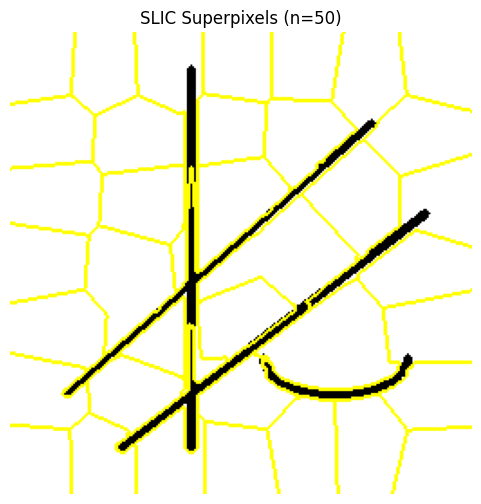

In [11]:
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage.io import imread
import matplotlib.pyplot as plt

# Load the synthetic image
image = img_as_float(imread("synthetic_wire.png"))

# Apply SLIC superpixel segmentation
segments = slic(image, n_segments=50, compactness=10, sigma=1, start_label=1)

# Visualize the superpixels overlaid on the original image
plt.figure(figsize=(6,6))
plt.imshow(mark_boundaries(image, segments))
plt.title("SLIC Superpixels (n=50)")
plt.axis('off')
plt.show()

In [12]:
import networkx as nx
from skimage.segmentation import find_boundaries
from skimage.measure import regionprops
import numpy as np

# Initialize the graph
G = nx.Graph()

# Get region properties of each superpixel
props = regionprops(segments)

# Add nodes with their centroids
for region in props:
    G.add_node(region.label, centroid=region.centroid)

# Create an adjacency matrix based on pixel adjacency
height, width = segments.shape
for y in range(height - 1):
    for x in range(width - 1):
        current_label = segments[y, x]
        right_label = segments[y, x + 1]
        down_label = segments[y + 1, x]

        if current_label != right_label:
            G.add_edge(current_label, right_label)
        if current_label != down_label:
            G.add_edge(current_label, down_label)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph has 37 nodes and 82 edges


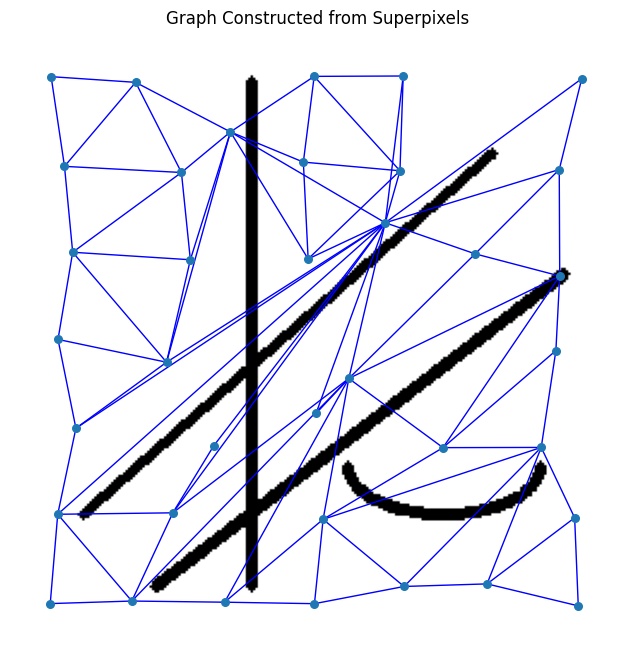

In [13]:
# Visualize the graph on top of the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
pos = {node: (prop.centroid[1], prop.centroid[0]) for node, prop in zip(G.nodes, props)}
nx.draw(G, pos, node_size=30, edge_color='blue', with_labels=False)
plt.title("Graph Constructed from Superpixels")
plt.axis('off')
plt.show()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Sort all node IDs
node_ids = sorted(G.nodes)

# Pick the first and last node as pseudo "wire terminals"
start_node = node_ids[0]
end_node = node_ids[-1]

print(f"Simulating wire path from node {start_node} to node {end_node}")


Simulating wire path from node 1 to node 37


In [16]:
# Compute shortest path based on number of hops (since no weights yet)
try:
    path = nx.shortest_path(G, source=start_node, target=end_node)
    print(f"Path length: {len(path)}")
except nx.NetworkXNoPath:
    print("No path found between selected nodes.")
    path = []


Path length: 9


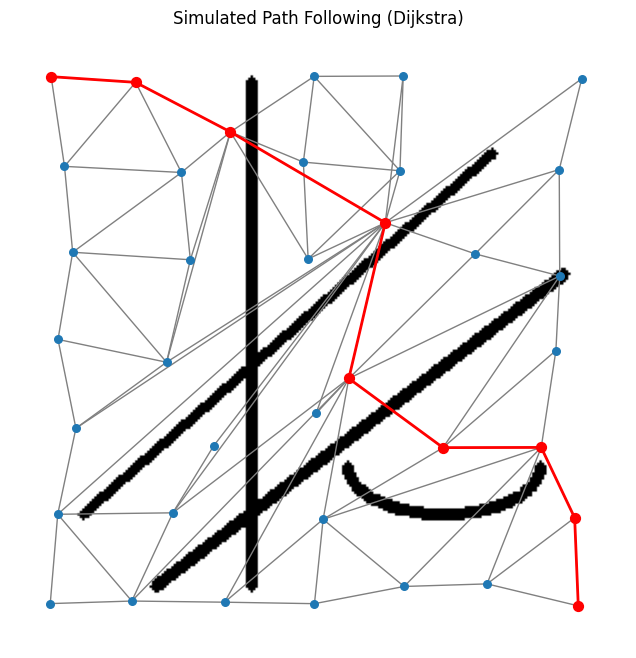

In [17]:
# Draw the path on top of image
plt.figure(figsize=(8, 8))
plt.imshow(image)
pos = {node: (prop.centroid[1], prop.centroid[0]) for node, prop in zip(G.nodes, props)}

# Highlight the path in red
if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw(G, pos, node_size=30, edge_color='gray', with_labels=False)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=50)
    plt.title("Simulated Path Following (Dijkstra)")
else:
    plt.title("No Path Found")

plt.axis('off')
plt.show()

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Wire Testing.png"
image = img_as_float(imread(image_path))

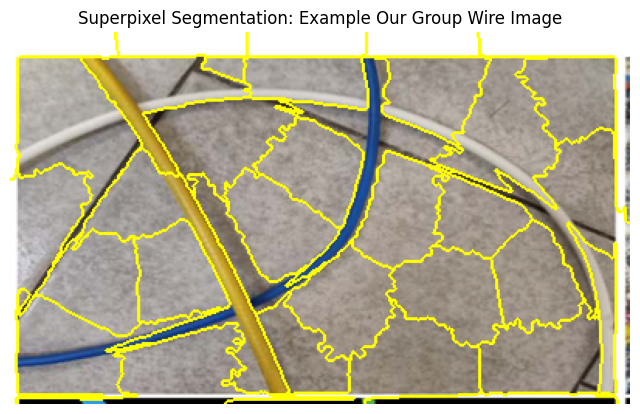

In [27]:
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage.io import imread
import matplotlib.pyplot as plt

# Load your uploaded image
image_path = "/content/drive/MyDrive/Colab Notebooks/Wire Testing.png"

# Load image and remove alpha if present
image = imread(image_path)

# If image has 4 channels (RGBA), convert to RGB
if image.shape[-1] == 4:
    image = image[:, :, :3]

# Convert to float for skimage processing
image = img_as_float(image)


# Run superpixel segmentation
segments = slic(image, n_segments=50, compactness=10, sigma=1, start_label=1)

# Show superpixels on image
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(image, segments))
plt.title("Superpixel Segmentation: Example Our Group Wire Image")
plt.axis('off')
plt.show()

In [28]:
import networkx as nx
from skimage.measure import regionprops

# Initialize graph
G = nx.Graph()

# Get region properties (e.g., centroid) for all superpixels
props = regionprops(segments)

# Add nodes with centroids
for region in props:
    G.add_node(region.label, centroid=region.centroid)

# Add edges between adjacent superpixels (up/down/right/left)
height, width = segments.shape
for y in range(height - 1):
    for x in range(width - 1):
        current = segments[y, x]
        right = segments[y, x + 1]
        down = segments[y + 1, x]

        if current != right:
            G.add_edge(current, right)
        if current != down:
            G.add_edge(current, down)


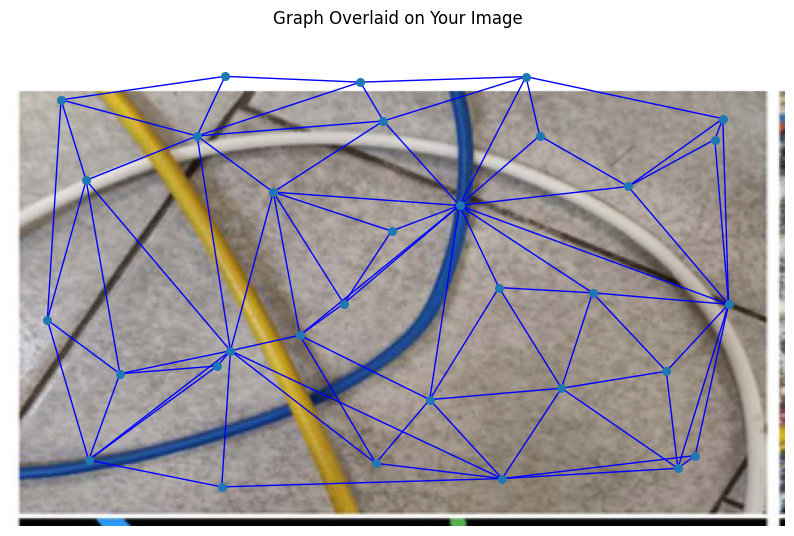

In [29]:
# Prepare node positions from centroids
pos = {node: (prop.centroid[1], prop.centroid[0]) for node, prop in zip(G.nodes, props)}

# Draw
plt.figure(figsize=(10, 10))
plt.imshow(image)
nx.draw(G, pos, node_size=30, edge_color='blue', with_labels=False)
plt.title("Graph Overlaid on Your Image")
plt.axis('off')
plt.show()


In [30]:
# Sort all node labels
node_ids = sorted(G.nodes)

# Choose start and end nodes (simulate wire ends)
start_node = node_ids[0]
end_node = node_ids[-1]

print(f"Simulating path from node {start_node} to node {end_node}")


Simulating path from node 1 to node 32


In [31]:
# Try finding shortest path (based on number of hops, no weights yet)
try:
    path = nx.shortest_path(G, source=start_node, target=end_node)
    print(f"✅ Found path with {len(path)} nodes")
except nx.NetworkXNoPath:
    print("⚠️ No path found between selected nodes.")
    path = []


✅ Found path with 4 nodes


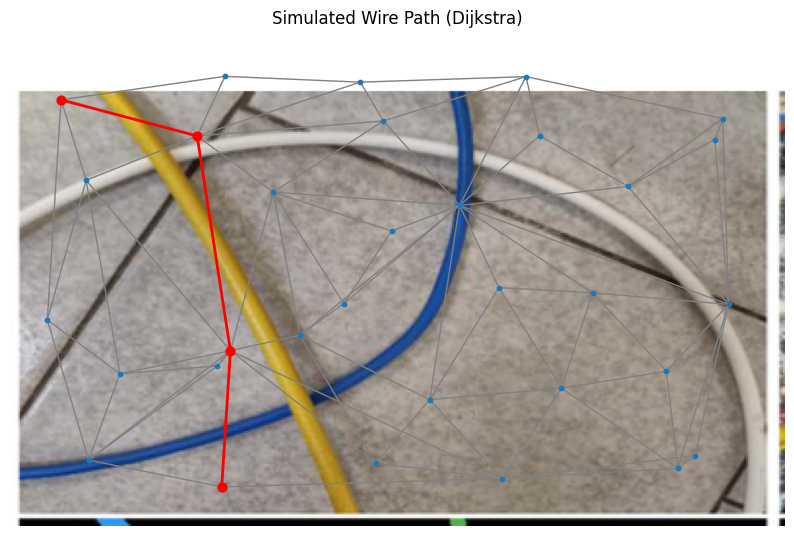

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
pos = {node: (prop.centroid[1], prop.centroid[0]) for node, prop in zip(G.nodes, props)}

# Draw entire graph (light)
nx.draw(G, pos, node_size=10, edge_color='gray', with_labels=False)

# Highlight path in red
if path:
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=40)
    plt.title("Simulated Wire Path (Dijkstra)")
else:
    plt.title("No Path Found")

plt.axis('off')
plt.show()


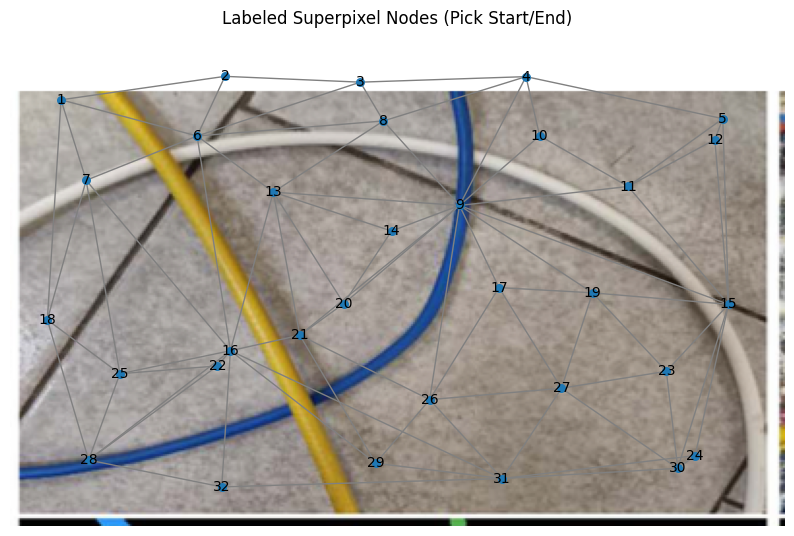

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
pos = {node: (prop.centroid[1], prop.centroid[0]) for node, prop in zip(G.nodes, props)}

nx.draw(G, pos, node_size=30, edge_color='gray', with_labels=False)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Labeled Superpixel Nodes (Pick Start/End)")
plt.axis('off')
plt.show()


In [34]:
import numpy as np
import cv2

# Create a blank mask
mask = np.zeros(segments.shape, dtype=np.uint8)

# Fill mask with superpixel labels along the path
for node in path:
    mask[segments == node] = 255


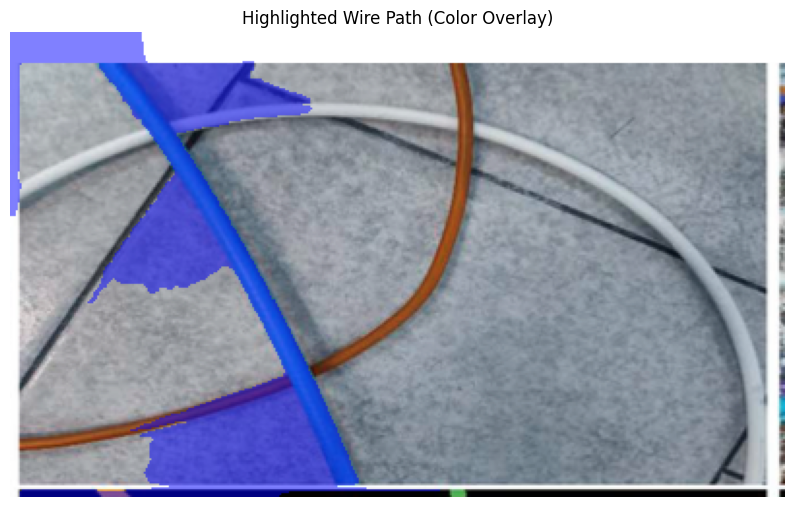

In [35]:
# Convert image to uint8 for OpenCV blending
image_uint8 = (image * 255).astype(np.uint8)

# Create a red color overlay
red_overlay = np.zeros_like(image_uint8)
red_overlay[:, :, 0] = 255  # Red channel

# Create 3-channel mask
mask_3ch = cv2.merge([mask, mask, mask])

# Blend original + red overlay where mask is active
blended = np.where(mask_3ch > 0, cv2.addWeighted(image_uint8, 0.5, red_overlay, 0.5, 0), image_uint8)

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.title("Highlighted Wire Path (Color Overlay)")
plt.axis('off')
plt.show()
